### Import modules

In [15]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# # change directory to 'master_study/analysis'
# os.chdir('master_study/analysis')

# Local imports
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



In [16]:
# Define study
STUDY_NAME = "tunescan_50cm_2024_agressive_small"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0223/config_final.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  normalized amplitude in xy-plane  \
beam  qx     qy                                                            
lhcb1 62.305 60.310      base_collider                            12.250   
             60.311      base_collider                            12.938   
             60.312      base_collider                            10.188   
             60.313      base_collider                            11.875   
             60.314      base_collider                            12.312   
...                                ...                               ...   
      62.314 60.315      base_collider                            14.000   
             60.316      base_collider                            13.438   
             60.317      base_collider                            12.438   
             60.318      base_collider                            12.688   
             60.319      base_collider                            12.062   

                         qx      qy   dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  qx     qy                                                           
lhcb1 62.305 60.310  62.305  60.310  10.0  10.0         NaN         NaN   
             60.311  62.305  60.311  10.0  10.0         NaN         NaN   
             60.312  62.305  60.312  10.0  10.0         NaN         NaN   
             60.313  62.305  60.313  10.0  10.0         NaN         NaN   
             60.314  62.305  60.314  10.0  10.0         NaN         NaN   
...                     ...     ...   ...   ...         ...         ...   
      62.314 60.315  62.314  60.315  10.0  10.0         NaN         NaN   
             60.316  62.314  60.316  10.0  10.0         NaN         NaN   
             60.317  62.314  60.317  10.0  10.0         NaN         NaN   
             60.318  62.314  60.318  10.0  10.0         NaN         NaN   
             60.319  62.314  60.319  10.0  10.0         NaN         NaN   

                     i_oct_b1  i_oct_b2  num_particles_per_bunch  \
beam  qx     qy                                                    
lhcb1 62.305 60.310     100.0     100.0              180000000.0   
             60.311     100.0     100.0              180000000.0   
             60.312     100.0     100.0              180000000.0   
             60.313     100.0     100.0              180000000.0   
             60.314     100.0     100.0              180000000.0   
...                       ...       ...                      ...   
      62.314 60.315     100.0     100.0              180000000.0   
             60.316     100.0     100.0              180000000.0   
             60.317     100.0     100.0              180000000.0   
             60.318     100.0     100.0              180000000.0   
             60.319     100.0     100.0              180000000.0   

                     crossing_angle  
beam  qx     qy                      
lhcb1 62.305 60.310           150.0  
             60.311           150.0  
             60.312           150.0  
             60.313           150.0  
             60.314           150.0  
...                             ...  
      62.314 60.315           150.0  
             60.316           150.0  
             60.317           150.0  
             60.318           150.0  
             60.319           150.0  

[93 rows x 12 columns]

In [17]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot


qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314
qy,,,,,,,,,,
60.310,12.250,11.750,12.312,11.688,10.188,NaN,12.000,11.750,12.500,NaN
60.311,12.938,11.062,11.312,12.188,11.750,11.938,NaN,12.688,10.562,10.125
60.312,10.188,12.688,10.250,11.750,11.812,13.188,NaN,NaN,11.938,10.250
60.313,11.875,11.000,10.125,10.500,12.000,12.375,11.438,13.312,NaN,12.938
60.314,12.312,11.438,11.562,10.750,12.688,12.938,12.062,11.500,12.500,NaN
60.315,11.750,11.000,11.500,11.000,13.000,11.750,13.062,11.625,13.125,14.000
60.316,10.750,10.062,10.438,10.875,10.750,12.250,12.562,11.250,12.000,13.438
60.317,11.188,10.500,10.188,11.812,10.750,10.562,11.938,12.188,11.312,12.438
60.318,10.438,10.812,10.750,10.625,10.625,11.125,11.625,11.812,12.000,12.688


In [18]:
# Interpolate to fill missing values
df_to_plot = df_to_plot.interpolate(method="linear", limit_direction="both")

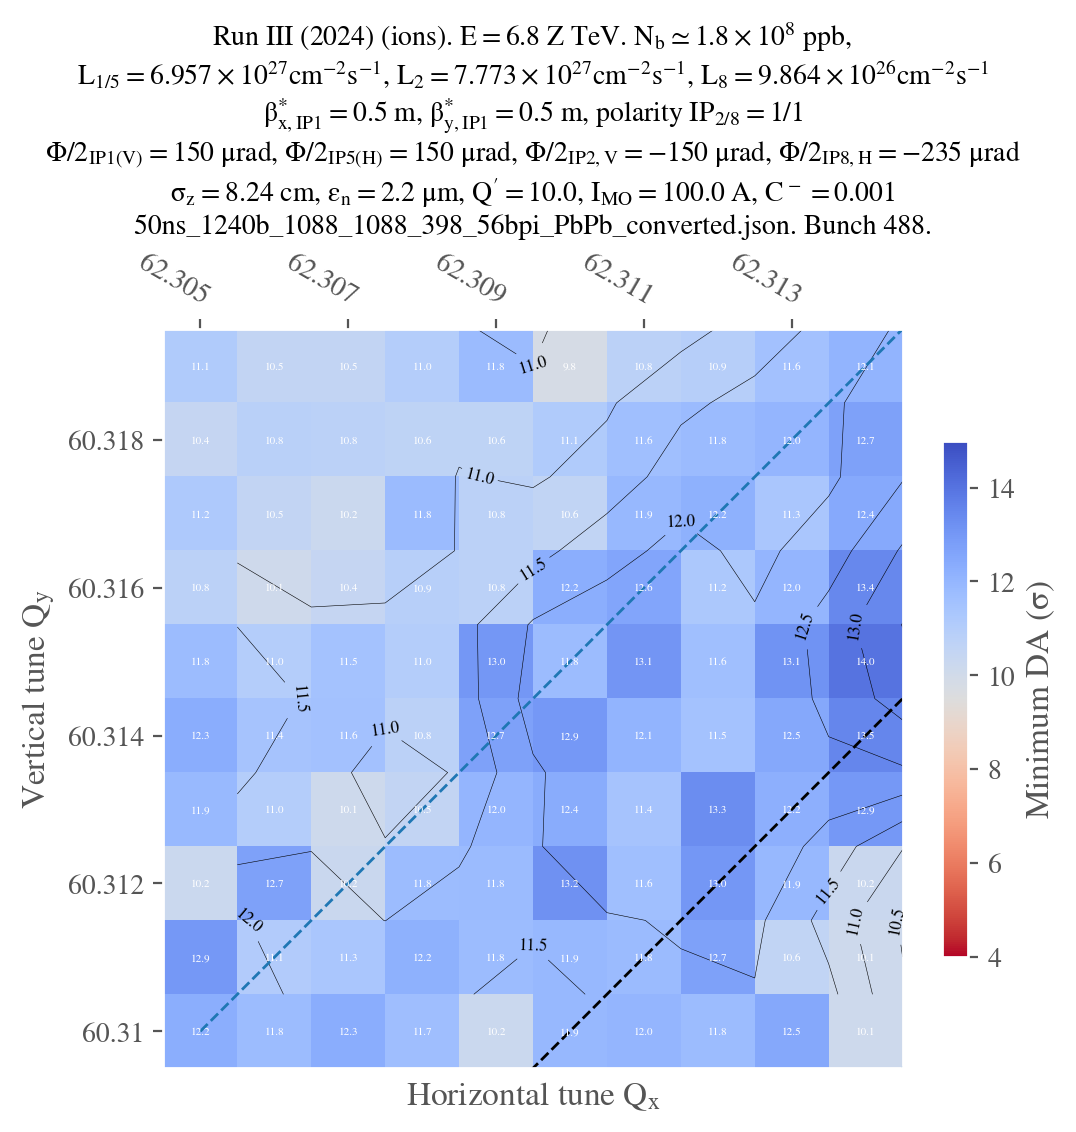

In [19]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.5,
    bety=0.5,
    Nb = True,
    green_contour = 2,
    extended_diagonal=False,
    small_ext_diagonal=True,
    vmin = 4,
    vmax = 15.,
    smooth_symmetry = False,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)